In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('Gold_Yearly.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


#Harga tertera adalah untuk 1 troy ons emas berjangka, 1 troy ons setara dengan 31,1 gram


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
48,2017,1260.39,1162.00,1351.20,1162.00,1296.50,0.1257
49,2018,1268.93,1312.80,1360.25,1176.70,1281.65,-0.0115
50,2019,1393.34,1287.20,1542.60,1270.05,1523.00,0.1883
51,2020,1773.73,1520.55,2058.40,1472.35,1895.10,0.2443
52,2021,1799.10,1946.60,1954.40,1678.00,1783.90,-0.0587


In [ ]:
# number of rows and columns
gold_data.shape

(53, 7)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   53 non-null     int64  
 1   Average
Closing Price  53 non-null     float64
 2   Year Open              53 non-null     float64
 3   Year High              53 non-null     float64
 4   Year Low               53 non-null     float64
 5   Year Close             53 non-null     float64
 6   Annual
% Change        53 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.0 KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Year                      0
Average\nClosing Price    0
Year Open                 0
Year High                 0
Year Low                  0
Year Close                0
Annual\n% Change          0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1995.000000,591.265094,575.181698,677.918679,520.668679,604.341321,0.100798
std,15.443445,497.289713,483.980198,560.304150,440.807918,500.820725,0.272544
min,1969.000000,35.960000,35.130000,39.190000,34.780000,35.210000,-0.321500
25%,1982.000000,294.120000,282.050000,326.250000,263.800000,289.200000,-0.044300
50%,1995.000000,383.730000,395.000000,421.400000,358.100000,391.000000,0.056800
75%,2008.000000,872.370000,840.750000,1023.500000,692.500000,865.000000,0.217400
max,2021.000000,1799.100000,1946.600000,2058.400000,1678.000000,1895.100000,1.334100


Correlation:

Positive Correlation
Negative Correlation

In [ ]:
correlation = gold_data.corr()

<AxesSubplot:>

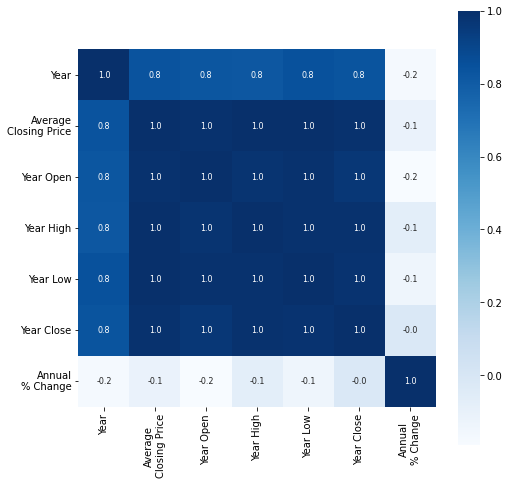

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['Average\nClosing Price'])

Year                      0.838515
Average\nClosing Price    1.000000
Year Open                 0.987634
Year High                 0.995449
Year Low                  0.996797
Year Close                0.990643
Annual\n% Change         -0.110603
Name: Average\nClosing Price, dtype: float64


C:\Users\ayyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average\nClosing Price', ylabel='Density'>

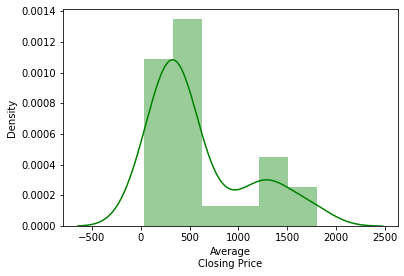

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['Average\nClosing Price'],color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Year Open','Year High', 'Year Low','Year Close','Annual\n% Change','Average\nClosing Price'],axis=1)
Y = gold_data['Average\nClosing Price']

In [ ]:
print(X)

    Year
0   1969
1   1970
2   1971
3   1972
4   1973
5   1974
6   1975
7   1976
8   1977
9   1978
10  1979
11  1980
12  1981
13  1982
14  1983
15  1984
16  1985
17  1986
18  1987
19  1988
20  1989
21  1990
22  1991
23  1992
24  1993
25  1994
26  1995
27  1996
28  1997
29  1998
30  1999
31  2000
32  2001
33  2002
34  2003
35  2004
36  2005
37  2006
38  2007
39  2008
40  2009
41  2010
42  2011
43  2012
44  2013
45  2014
46  2015
47  2016
48  2017
49  2018
50  2019
51  2020
52  2021


In [ ]:
print(Y)

0       41.10
1       35.96
2       40.80
3       58.17
4       97.12
5      158.76
6      160.87
7      124.80
8      147.84
9      193.57
10     307.01
11     614.75
12     459.16
13     376.11
14     423.71
15     360.65
16     317.42
17     368.20
18     446.84
19     436.78
20     381.27
21     383.73
22     362.34
23     343.87
24     360.05
25     384.16
26     384.07
27     387.73
28     331.00
29     294.12
30     278.86
31     279.29
32     271.19
33     310.08
34     363.83
35     409.53
36     444.99
37     604.34
38     696.43
39     872.37
40     973.66
41    1226.66
42    1573.16
43    1668.86
44    1409.51
45    1266.06
46    1158.86
47    1251.92
48    1260.39
49    1268.93
50    1393.34
51    1773.73
52    1799.10
Name: Average\nClosing Price, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 792.9803  456.2223  288.447  1550.6956 1259.8171   56.9153  369.3354
   56.9153  363.292   464.0589  205.0627]


In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9707592244487806


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

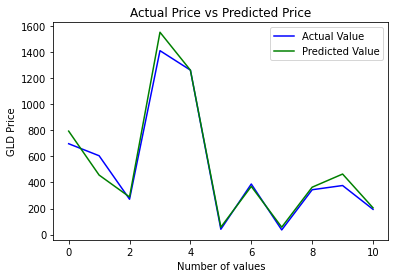

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
pd.to_pickle(regressor,'gold_rbf.pkl')

In [ ]:
## load the model from disk
loaded_model = pickle.load(open('gold_rbf.pkl', 'rb'))

In [ ]:
#Print The Type of Regressor Model
print(loaded_model)

RandomForestRegressor()


In [ ]:
#Check the accuracy of the model
result = loaded_model.score(X_test, Y_test)

In [ ]:
print(result)

0.9707592244487806
